In [1]:
%matplotlib inline

In [2]:
# dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import scipy.stats as sts # stats module from SciPy.

In [3]:
# files to load in as DataFrames
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
## Step 1: Import CSVs into DataFrames using pandas .read_csv()
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [5]:
# preview City DataFrame
#city_data_df

In [6]:
# preview Ride DataFrame
#ride_data_df

In [7]:
# INSPECT DATA TO PREPARE FOR MERGE

# inspect City DataFrame Data
#city_data_df.count() # count of columns that are not null 
#city_data_df.isnull().sum() # get count of null values (should be 0)
#city_data_df.dtypes() # check each column's data type

In [8]:
# inspect Ride DataFrame Data
#ride_data_df.count() # count of columns that are not null
#ride_data_df.isnull().sum() # get count of null values (should be 0)
#ride_data_df.dtypes # check each column's data type

In [9]:
## Step 2: Merge City and Ride DataFrames using pandas .merge()
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# preview new merged DataFrame to confirm successful merge
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [10]:
## Step 3: Create a bubble chart
# This will showcase the average fare vs. the total number of rides for each city type.
# Bubble size will be based on the total number of drivers 

In [11]:
# PREPARE DATA FOR BUBBLE CHART
# create a new DataFrame for each city type 
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

# preview new DataFrames. they should only have one city type each
#urban_cities_df.head()
#suburban_cities_df.head()
#rural_cities_df.head()

In [12]:
# get the number of rides for each city type using .groupby() and .count()
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [13]:
# get average fare for each city type using .groupby() and .mean()
urban_average_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_average_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_average_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [14]:
# get the average number of drivers for each city type using .groupby() and .mean()
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

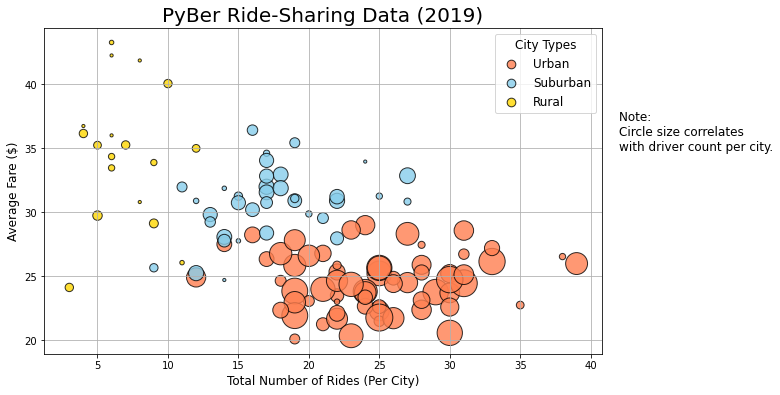

In [15]:
# BUILD A SCATTER PLOT FOR EACH CITY TYPE USING pyplot .scatter()

# make it bigger
plt.subplots(figsize=(10, 6))

# urban city data
plt.scatter(urban_ride_count, 
            urban_average_fare, 
            s = 10 * urban_driver_count, 
            c = "coral", 
            edgecolor = "black", 
            linewidths = 1, 
            alpha = 0.8, 
            label = "Urban")

# suburban city data
plt.scatter(suburban_ride_count,
            suburban_average_fare,
            s = 10 * suburban_driver_count,
            c = "skyblue",
            edgecolor = "black",
            linewidths = 1,
            alpha = 0.8,
            label = "Suburban")

# rural city data
plt.scatter(rural_ride_count,
            rural_average_fare,
            s = 10 * rural_driver_count,
            c = "gold",
            edgecolor = "black",
            linewidths = 1,
            alpha = 0.8,
            label = "Rural")

# title & formatting
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# create a legend using .legend()
lgnd = plt.legend(fontsize = "12", # fontsize of the actual legend key
                  mode = "Expanded",
                  scatterpoints = 1,
                  loc = "best",
                  title = "City Types")

lgnd.legendHandles[0]._sizes = [75] # change size of the first handle (urban) using legendHandles[]._sizes
lgnd.legendHandles[1]._sizes = [75] # change size of the second handle (suburban) using legendHandles[]._sizes
lgnd.legendHandles[2]._sizes = [75] # change size of the third handle (rural) using legendHandles[]._sizes

lgnd.get_title().set_fontsize(12) # fontsize of the legend title using .get_title() and .set_fontsize()

# add text label about circle size using .txt()
plt.text(42, 35, 
         "Note: \nCircle size correlates \nwith driver count per city.", 
         fontsize = "12", 
         wrap = True)

# save the scatterplot using .savefig()
plt.savefig("Analysis/Fig1.png",
            bbox_inches = "tight") # to make sure text isn't cut off in .png export

# show the scatter plot using .show()
plt.show()

In [16]:
## Step 4a: Get summary statistics for the total number of rides for each city type
# get Ride Count mean, median, and mode for each city type using NumPy

# URBAN
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

# SUBURBAN
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"\nThe mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")
median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

# RURAL
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"\nThe mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [17]:
## Step 4b: Get summary statistics for Fares to find average fares by city type
# get Fare mean, median, and mode for each city type using NumPy

# URBAN
urban_fares = urban_cities_df["fare"]

mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

# SUBURBAN 
suburban_fares = suburban_cities_df["fare"]

mean_suburban_fares = np.mean(suburban_fares)
print(f"\nThe mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

# RURAL
rural_fares = rural_cities_df["fare"]

mean_rural_fares = np.mean(rural_fares)
print(f"\nThe mean fare price for rural trips is ${mean_rural_fares:.2f}.")
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [18]:
## Step 4c: Get summary statistics for Drivers by city type.
# get Driver mean, median, and mode for each city type using NumPy

# URBAN
urban_drivers = urban_cities_df['driver_count']

mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers in urban cities is {mean_urban_drivers:.0f}.")
median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers in urban cities is {median_urban_drivers:.0f}.")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers in urban cities is {mode_urban_drivers}.")

# SUBURBAN
suburban_drivers = suburban_cities_df['driver_count']

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"\nThe mean number of drivers in suburban cities is {mean_suburban_drivers:.0f}.")
median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers in suburban cities is {median_suburban_drivers:.0f}.")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers in suburban cities is {mode_suburban_drivers}.")

# RURAL
rural_drivers = rural_cities_df['driver_count']

mean_rural_drivers = np.mean(rural_drivers)
print(f"\nThe mean number of drivers in rural cities is {mean_rural_drivers:.0f}.")
median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers in rural cities is {median_rural_drivers:.0f}.")
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers in rural cities is {mode_rural_drivers}.")

The mean number of drivers in urban cities is 37.
The median number of drivers in urban cities is 37.
The mode number of drivers in urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).

The mean number of drivers in suburban cities is 14.
The median number of drivers in suburban cities is 16.
The mode number of drivers in suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).

The mean number of drivers in rural cities is 4.
The median number of drivers in rural cities is 4.
The mode number of drivers in rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


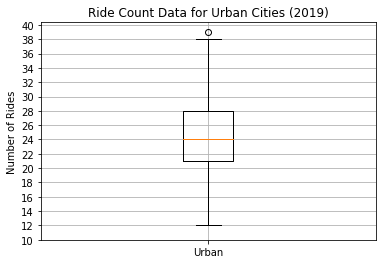

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [19]:
## Step 5a: Create box-and-whisker plots that visualize the number of rides for each city type

# create a Ride Count box-and-whisker plot for urban cities using ax.boxplot()
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data for Urban Cities (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step = 2.0))
ax.grid()

# Show box-and-whisker plot using .show()
plt.show()
# Get summary statistics using .describe()
urban_ride_count.describe()

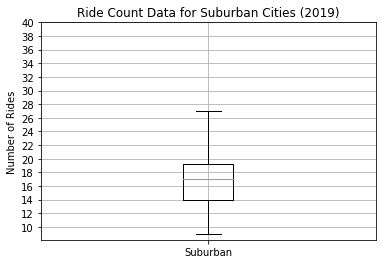

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [20]:
# create a Ride Count box-and-whisker plot for suburban cities using ax.boxplot()
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data for Suburban Cities (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step = 2.0))
ax.grid()

# Show box-and-whisker plot using .show()
plt.show()
# Get summary statistics using .describe()
suburban_ride_count.describe()

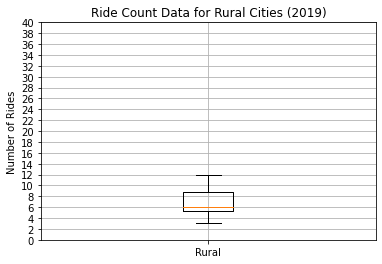

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [21]:
# create a Ride Count box-and-whisker plot for rural cities using ax.boxplot()
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data for Rural Cities (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 41, step = 2.0))
ax.grid()

# Show box-and-whisker plot using .show()
plt.show()
# Get summary statistics using .describe()
rural_ride_count.describe()

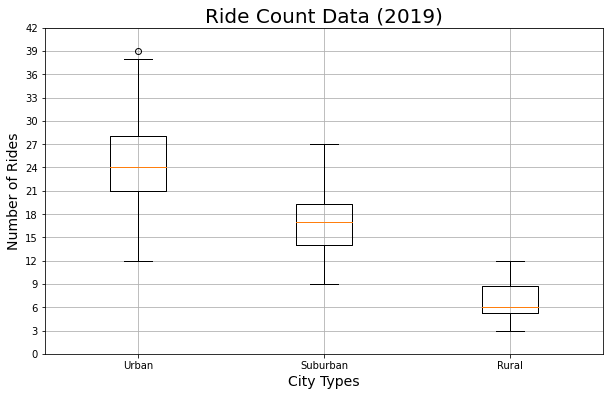

In [22]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize = (10, 6))

# Title & Formatting
ax.set_title('Ride Count Data (2019)', fontsize = 20)
ax.set_ylabel('Number of Rides', fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)

# create boxplot
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0, 45, step = 3.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [23]:
## Step 5a.1: Identify & investigate outliers
# based on the graph shown above, it may be good to analyze the outlier in the Urban Cities plot
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count of all cities.")

West Angela has the highest rider count of all cities.


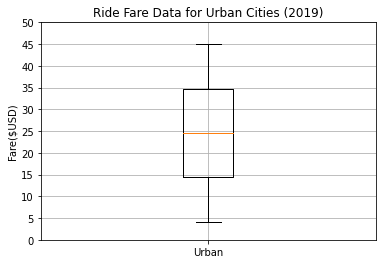

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [24]:
## Step 5b: Create box-and-whisker plots that visualize the fares for each city type.

# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Title & Formatting.
ax.set_title('Ride Fare Data for Urban Cities (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()

# Show box-and-whisker plot and print Summary Statistics
plt.show()
print("Summary Statistics")
urban_fares.describe()

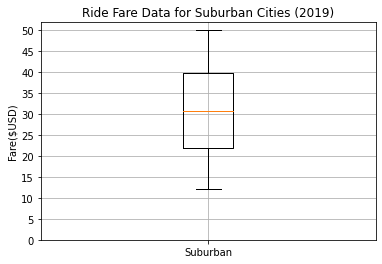

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [25]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# Title & Formatting.
ax.set_title('Ride Fare Data for Suburban Cities (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()

# Show box-and-whisker plot and print Summary Statistics
plt.show()
print("Summary Statistics")
suburban_fares.describe()

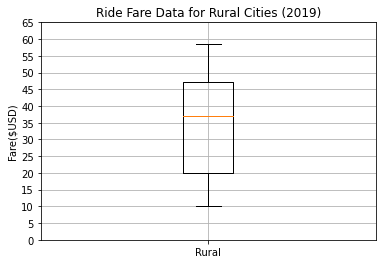

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [26]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# Title & Formatting.
ax.set_title('Ride Fare Data for Rural Cities (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 70, step=5.0))
ax.grid()

# Show box-and-whisker plot and print Summary Statistics
plt.show()
print("Summary Statistics")
rural_fares.describe()

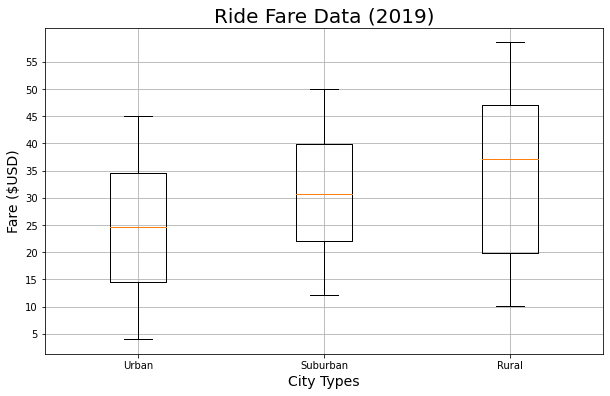

In [27]:
# Add all fare box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize = (10, 6))

# Title & Formatting
ax.set_title('Ride Fare Data (2019)', fontsize = 20)
ax.set_ylabel('Fare ($USD)', fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)
ax.set_yticks(np.arange(0, 60, step = 5.0))
ax.grid()

# create boxplot
ax.boxplot(ride_fares_data, labels = x_labels)

# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

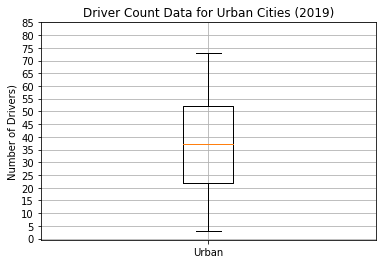

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [28]:
## Step 5c: Create box-and-whisker plots that visualize the driver count for each city type.

# Create the box-and-whisker plot for the urban city driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels = x_labels)

# Title & Formatting.
ax.set_title('Driver Count Data for Urban Cities (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step = 5.0))
ax.grid()

# Show box-and-whisker plot and print Summary Statistics
plt.show()
print("Summary Statistics")
urban_drivers.describe()

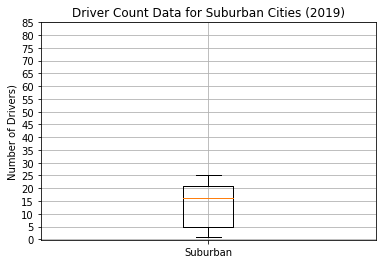

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [29]:
# Create the box-and-whisker plot for the suburban city driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels = x_labels)

# Title & Formatting.
ax.set_title('Driver Count Data for Suburban Cities (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step = 5.0))
ax.grid()

# Show box-and-whisker plot and print Summary Statistics
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

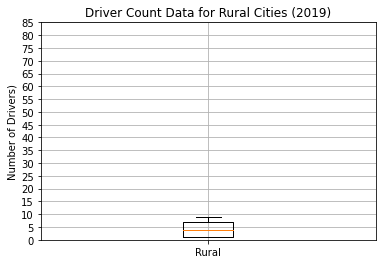

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [30]:
# Create the box-and-whisker plot for the rural city driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels = x_labels)

# Title & Formatting.
ax.set_title('Driver Count Data for Rural Cities (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step = 5.0))
ax.grid()

# Show box-and-whisker plot and print Summary Statistics
plt.show()
print("Summary Statistics")
rural_drivers.describe()

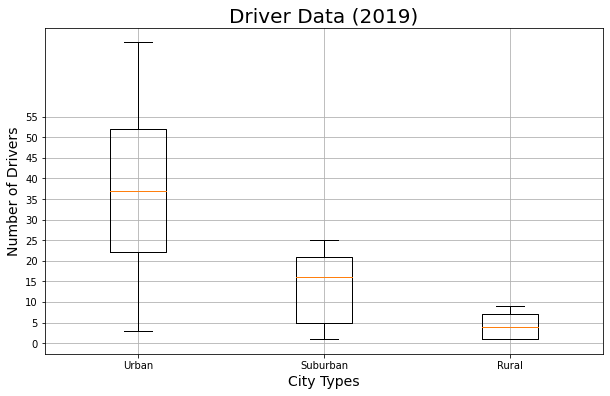

In [31]:
# Add all driver box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
drivers_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize = (10, 6))

# Title & Formatting
ax.set_title('Driver Data (2019)', fontsize = 20)
ax.set_ylabel('Number of Drivers', fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)
ax.set_yticks(np.arange(-5, 60, step = 5.0))
ax.grid()

# create boxplot
ax.boxplot(drivers_data, labels = x_labels)

# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [53]:
# import matplotlib to change default paramaters to rcParams
# NOTE: this is different than the matplotlib.pyplot we imported for plt
import matplotlib as mpl

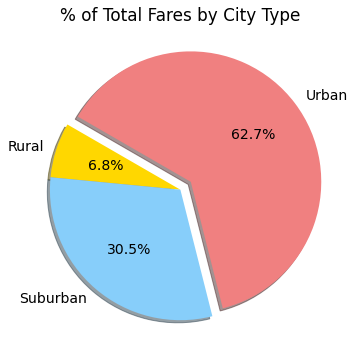

In [54]:
## Step 6a: Create a pie chart that visualizes the percent of total fares by city type

# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

# Add to pie chart
plt.subplots(figsize=(10, 6))

plt.pie(type_percents,
        labels = ["Rural", "Suburban", "Urban"],
        colors = ["gold", "lightskyblue", "lightcoral"],
        explode = [0, 0, 0.1],
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 150)

# add title
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14

# save figure
plt.savefig("analysis/Fig5.png")


# show figure
plt.show()

In [56]:
## Step 6b: Create a pie chart that visualizes the percent of total rides by city type

In [ ]:
## Step 6c: Create a pie chart that visualizes the percent of total drivers by city type